- Advanced Pandas args to catch errors in data files
- Datetime hell (excel vs txt files)
- Pandas quick plots and stats
- Sum columns (header hygiene, . vs [])
- Volume to mass flow
- Averaging data 
- Static plot (matplotlib) and dynamic plot (Plotly)


- Mass-ballance (data handling in Pandas, volume flow to mass flow, sum seps)
- Pandas and numpy in computer memory and .copy() pointers vs copies
- Clean steamfield data (when to excel and when to Python)


# Data Handling with Pandas

Python + Pandas is a powerful data handling toolkit. However, practical real-world data handing is not always python data handling. 

In [1]:
import pandas as pd

## Handle import errors

Use the excel file '1-Data-errors.xlsx' to explore common data/datetime handling errors.

In [34]:
error_df = pd.read_excel(
    r'1-Data-errors.xlsx', 
    sheet_name='Sheet1',
    #header=1, # removes row 0, makes row 1 the headder
    #na_values=['na', '', ' '] # replaces value with NaN
    )

In [35]:
error_df

,Date_best,Date_international,Date_USA,Data_clean,Data_with_errors,Data_with_null,Header_error,Unnamed: 7
0,2020-06-03,2020-06-03,2020-03-06,3.00,x,3.00,3.00,NaN
1,2020-06-04,2020-06-04,2020-04-06,4.30,4.3,4.30,4.30,NaN
2,2020-07-03,2020-07-03,2020-03-07,3.55,3.55,NaN,3.55,NaN
3,2020-06-12,2020-06-12,2020-12-06,2.33,"2,33",2.33,2.33,NaN
4,2020-04-03,2020-04-03,2020-03-04,94.00,94,NaN,94.00,NaN


In [29]:
error_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date_best           5 non-null      datetime64[ns]
 1   Date_international  5 non-null      datetime64[ns]
 2   Date_USA            5 non-null      datetime64[ns]
 3   Data_clean          5 non-null      float64       
 4   Data_with_errors    5 non-null      object        
 5   Data_with_null      3 non-null      float64       
 6    Header_error       5 non-null      float64       
 7   Unnamed: 7          1 non-null      object        
dtypes: datetime64[ns](3), float64(3), object(2)
memory usage: 448.0+ bytes


In [14]:
# Find the offending value

test_col = error_df['Data_with_errors'].values

for value in test_col:
    try:
        float(value)
    except:
        print(value)

# Go back to excel and CTRL + F for the offending value

x
2,33


In [22]:
print(error_df['Data_clean']) # This works

0     3.00
1     4.30
2     3.55
3     2.33
4    94.00
Name: Data_clean, dtype: float64


In [23]:
print(error_df('Header_error')) # But this does not... why?

TypeError: 'DataFrame' object is not callable

In [ ]:
# import same data as csv and look at the datetime


In [41]:
df_errors_from_csv = pd.read_csv(r'1-Data-errors.csv')

In [42]:
df_errors_from_csv

,Date_best,Date_international,Date_USA,Data_clean,Data_with_errors,Data_with_null,Header_error,Unnamed: 7
0,3-Jun-20,03/06/20,06/03/20,3.00,x,3,3.00,NaN
1,4-Jun-20,04/06/20,06/04/20,4.30,4.3,4.3,4.30,NaN
2,3-Jul-20,03/07/20,07/03/20,3.55,3.55,NaN,3.55,NaN
3,12-Jun-20,12/06/20,06/12/20,2.33,"2,33",2.33,2.33,
4,3-Apr-20,03/04/20,04/03/20,94.00,94,na,94.00,NaN


In [43]:
df_errors_from_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date_best           5 non-null      object 
 1   Date_international  5 non-null      object 
 2   Date_USA            5 non-null      object 
 3   Data_clean          5 non-null      float64
 4   Data_with_errors    5 non-null      object 
 5   Data_with_null      4 non-null      object 
 6    Header_error       5 non-null      float64
 7   Unnamed: 7          1 non-null      object 
dtypes: float64(2), object(6)
memory usage: 448.0+ bytes


Useful blog post https://towardsdatascience.com/4-tricks-you-should-know-to-parse-date-columns-with-pandas-read-csv-27355bb2ad0e

In [141]:
df_errors_from_csv = pd.read_csv(
    r'1-Data-errors.csv',
    parse_dates = ['Date_best','Date_international','Date_USA'] # default is to parse as US format
    )

In [142]:
df_errors_from_csv

,Date_best,Date_international,Date_USA,Data_clean,Data_with_errors,Data_with_null,Header_error,Unnamed: 7
0,2020-06-03,2020-03-06,2020-06-03,3.00,x,3,3.00,NaN
1,2020-06-04,2020-04-06,2020-06-04,4.30,4.3,4.3,4.30,NaN
2,2020-07-03,2020-03-07,2020-07-03,3.55,3.55,NaN,3.55,NaN
3,2020-06-12,2020-12-06,2020-06-12,2.33,"2,33",2.33,2.33,
4,2020-04-03,2020-03-04,2020-04-03,94.00,94,na,94.00,NaN


In [143]:
df_errors_from_csv = pd.read_csv(
    r'1-Data-errors.csv',
    parse_dates = ['Date_best','Date_international','Date_USA'],
    dayfirst=True # switch to parse as international format
    )

In [144]:
df_errors_from_csv

,Date_best,Date_international,Date_USA,Data_clean,Data_with_errors,Data_with_null,Header_error,Unnamed: 7
0,2020-06-03,2020-06-03,2020-03-06,3.00,x,3,3.00,NaN
1,2020-06-04,2020-06-04,2020-04-06,4.30,4.3,4.3,4.30,NaN
2,2020-07-03,2020-07-03,2020-03-07,3.55,3.55,NaN,3.55,NaN
3,2020-06-12,2020-06-12,2020-12-06,2.33,"2,33",2.33,2.33,
4,2020-04-03,2020-04-03,2020-03-04,94.00,94,na,94.00,NaN


Note how in all cases the "Date_best" format worked. This format saves you and your international collaborators / clients a lot of pain. 

## Import case study data

In [152]:
well_data = pd.read_excel(r'1-Data-case-study.xlsx', sheet_name='ops_data')

In [153]:
well_data

,Date_daily,P-1 TMF T/hr,P-2 TMF T/hr,P-3 TMF T/hr,I-1 TMF T/hr RAW,I-1 TMF T/hr,I-2 TMF T/hr
0,1998-01-04,356.058657,NaN,NaN,63.378441,63.378441,253.513764
1,1998-01-05,363.455202,NaN,NaN,64.695026,64.695026,258.780104
2,1998-01-06,397.704763,NaN,NaN,70.791448,70.791448,283.165791
3,1998-01-07,304.797127,NaN,NaN,54.253889,54.253889,217.015554
4,1998-01-08,302.808081,NaN,NaN,53.899838,53.899838,215.599354
...,...,...,...,...,...,...,...
1819,2002-12-28,NaN,NaN,400.373519,71.266486,71.266486,285.065945
1820,2002-12-29,NaN,NaN,402.687640,71.678400,71.678400,286.713599
1821,2002-12-30,NaN,NaN,400.151861,71.227031,71.227031,284.908125
1822,2002-12-31,NaN,NaN,399.515955,71.113840,71.113840,284.455360


**Syntax of plot()**

DataFrame.plot(x=None, y=None, **kwds)

<AxesSubplot: xlabel='Date_daily'>

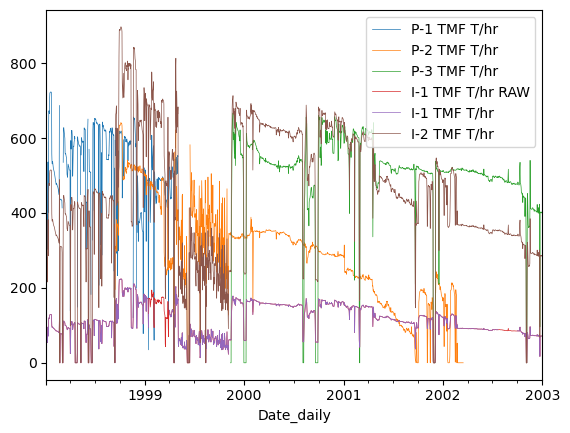

In [154]:
well_data.plot(
    x='Date_daily',
    #marker='.',
    linewidth=0.5
    )

#well_data.plot.scatter(x='Date_daily')

In [155]:
well_data.columns

Index(['Date_daily', 'P-1 TMF T/hr', 'P-2 TMF T/hr', 'P-3 TMF T/hr',
       'I-1 TMF T/hr RAW', 'I-1 TMF T/hr', 'I-2 TMF T/hr'],
      dtype='object')

In [156]:
well_data['Total_prod_tph'] = well_data['P-1 TMF T/hr'].fillna(0) + well_data['P-2 TMF T/hr'].fillna(0) + well_data['P-3 TMF T/hr'].fillna(0)
well_data['Total_inj_tph'] = well_data['I-1 TMF T/hr'].fillna(0) + well_data['I-2 TMF T/hr'].fillna(0)


In [157]:
well_data

,Date_daily,P-1 TMF T/hr,P-2 TMF T/hr,P-3 TMF T/hr,I-1 TMF T/hr RAW,I-1 TMF T/hr,I-2 TMF T/hr,Total_prod_tph,Total_inj_tph
0,1998-01-04,356.058657,NaN,NaN,63.378441,63.378441,253.513764,356.058657,316.892205
1,1998-01-05,363.455202,NaN,NaN,64.695026,64.695026,258.780104,363.455202,323.475129
2,1998-01-06,397.704763,NaN,NaN,70.791448,70.791448,283.165791,397.704763,353.957239
3,1998-01-07,304.797127,NaN,NaN,54.253889,54.253889,217.015554,304.797127,271.269443
4,1998-01-08,302.808081,NaN,NaN,53.899838,53.899838,215.599354,302.808081,269.499192
...,...,...,...,...,...,...,...,...,...
1819,2002-12-28,NaN,NaN,400.373519,71.266486,71.266486,285.065945,400.373519,356.332432
1820,2002-12-29,NaN,NaN,402.687640,71.678400,71.678400,286.713599,402.687640,358.391999
1821,2002-12-30,NaN,NaN,400.151861,71.227031,71.227031,284.908125,400.151861,356.135157
1822,2002-12-31,NaN,NaN,399.515955,71.113840,71.113840,284.455360,399.515955,355.569200


<AxesSubplot: xlabel='Date_daily'>

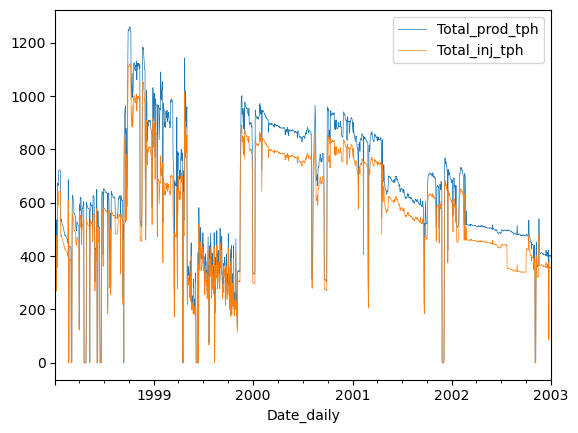

In [158]:
well_data.plot(
    x='Date_daily', 
    y=['Total_prod_tph','Total_inj_tph'],
    linewidth=0.5
    )
